In [1]:
# SH-I

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [3]:
files = [f for f in os.listdir() if (f.startswith('G3C_predicted') and f.endswith('.csv'))]

In [4]:
possible = ['hh', 'mm', 'll', 'hm', 'hl', 'mh', 'ml', 'lh', 'lm']

In [5]:
def abbreviate(binding):
    binding = binding.replace('low', 'l')
    binding = binding.replace('medium', 'm')
    binding = binding.replace('high', 'h')
    return binding

In [6]:
comp = pd.DataFrame()
result = pd.DataFrame(columns = ['params'] + possible)

for file in files:
    data = pd.read_csv(file)
    
    if not 'IUPAC' in comp:
        iupac = data['IUPAC']
        comp['IUPAC'] = iupac

    tar_pred = data['binding'].apply(abbreviate) + data['prediction'].apply(abbreviate)
    col_name = file.replace('G3C_predicted_', '').replace('.csv', '')
    comp[col_name] = tar_pred
    
    counts = {p : list(tar_pred).count(p) for p in possible}
    counts['params'] = col_name
    result = result.append(counts, ignore_index = True)

In [7]:
result['acc'] = ((result['hh'] + result['mm'] + result['ll']) / 603) * 100

In [8]:
result['acc_h'] = result['hh'] / (result['hh'] + result['hm'] + result['hl'])
result['acc_m'] = result['mm'] / (result['mh'] + result['mm'] + result['ml'])
result['acc_l'] = result['ll'] / (result['lh'] + result['lm'] + result['ll'])

In [9]:
result.sort_values('acc', ascending = False)

,params,hh,mm,ll,hm,hl,mh,ml,lh,lm,acc,acc_h,acc_m,acc_l
0,epochs100_lr1.0_soft,17,20,521,3,2,4,16,2,18,92.5373,0.772727,0.5,0.963031
2,epochs50_lr1.0_soft,17,21,520,2,3,5,14,3,18,92.5373,0.772727,0.525,0.961183
1,epochs25_lr1.0_soft,16,20,520,3,3,3,17,3,18,92.2056,0.727273,0.5,0.961183
4,epochs200_lr1.0_soft,17,20,519,3,2,5,15,2,20,92.2056,0.772727,0.5,0.959335
3,epochs5_lr1.0_soft,15,2,530,0,7,3,35,2,9,90.7131,0.681818,0.05,0.979667


In [10]:
comp.to_csv('G3C_comparison_soft.csv', index = False)
result.to_csv('G3C_result_soft.csv', index = False)

In [11]:
# sort
fix = 'epochs'
val_list = []

for p in result['params']:
    for e in p.split('_'):
        if fix in e:
            val = float(e.replace(fix, ''))
            val_list.append(val)
            
result['val'] = val_list
result = result.sort_values('val')
result['val'] = result['val'].astype(int).astype(str)

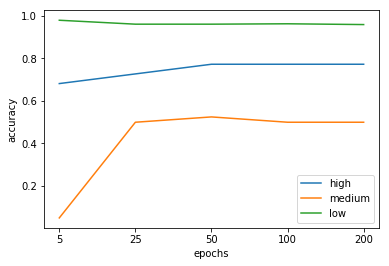

In [12]:
# plot class
plt.plot(result['val'], result['acc_h'].values, label = 'high')
plt.plot(result['val'], result['acc_m'].values, label = 'medium')
plt.plot(result['val'], result['acc_l'].values, label = 'low')
plt.xlabel(fix)
plt.ylabel('accuracy')
plt.legend(loc = 'lower right')

plt.savefig(fix + '_soft.pdf', bbox_inches = 'tight')
plt.show()

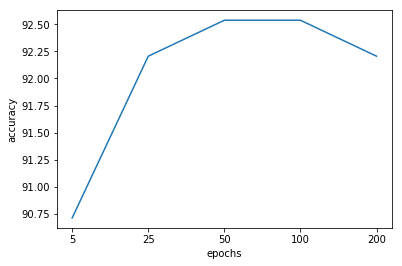

In [13]:
# plot accuracy

plt.plot(result['val'], result['acc'].values)
plt.xlabel(fix)
plt.ylabel('accuracy')

plt.savefig(fix + '_acc_soft.pdf', bbox_inches = 'tight')
plt.show()